# Software Design Mini Project #1: Text Mining by Prabha Dublish

For this project, I will be analyzing tweets wit the #guncontrol and #gunsense. See my additional write up (found on git hub) for additional information.

In [9]:
##Getting tweets with the word guncontrol

from pattern.web import Twitter

guncontrol = Twitter()
i = None
guncontroltweets=[]
for j in range(3):
    for tweet in guncontrol.search('\#guncontrol', start=i, count=100):
        guncontroltweets.append(tweet.text)
        i = tweet.id
        
import pickle

f = open('tweetguncontrol.pickle','w')
pickle.dump(guncontroltweets,f)
f.close()

input_file = open('tweetguncontrol.pickle','r')
reloaded_guncontrol_tweets = pickle.load(input_file)

In [2]:
##Getting tweets with the #gunsense

from pattern.web import Twitter

t = Twitter()
i = None
gunsensetweets=[]
for j in range(3):
    for tweet in t.search('\#gunsense', start=i, count=100):
        gunsensetweets.append(tweet.text)
        i = tweet.id
        
import pickle

f = open('tweetgunsense.pickle','w')
pickle.dump(gunsensetweets,f)
f.close()

input_file = open('tweetgunsense.pickle','r')
reloaded_gunsense_tweets = pickle.load(input_file)

In [4]:
##Determining political party breakdown for tweets with #guncontrol
import indicoio

indicoio.config.api_key = 'dff2e468122e118f7d78ea379d97bfe9'

libertarian=[]
liberal=[]
green=[]
conservative=[]

for i in reloaded_guncontrol_tweets:
    dictionary=indicoio.political(i)
    libertarian.append(dictionary[u'Libertarian'])
    liberal.append(dictionary[u'Liberal'])
    green.append(dictionary[u'Green'])
    conservative.append(dictionary[u'Conservative'])
    
import numpy as np
print np.mean(libertarian)
print np.mean(liberal)
print np.mean(green)
print np.mean(conservative)

0.266041023624
0.234102744337
0.262452678866
0.237403555712


In [3]:
##Determining political party breakdown for tweets with #gunsense
import indicoio

indicoio.config.api_key = 'dff2e468122e118f7d78ea379d97bfe9'

libertarian=[]
liberal=[]
green=[]
conservative=[]

for i in reloaded_gunsense_tweets:
    dictionary=indicoio.political(i)
    libertarian.append(dictionary[u'Libertarian'])
    liberal.append(dictionary[u'Liberal'])
    green.append(dictionary[u'Green'])
    conservative.append(dictionary[u'Conservative'])
    
import numpy as np
print np.mean(libertarian)
print np.mean(liberal)
print np.mean(green)
print np.mean(conservative)

0.294166108915
0.207438512659
0.247088676766
0.251306709597


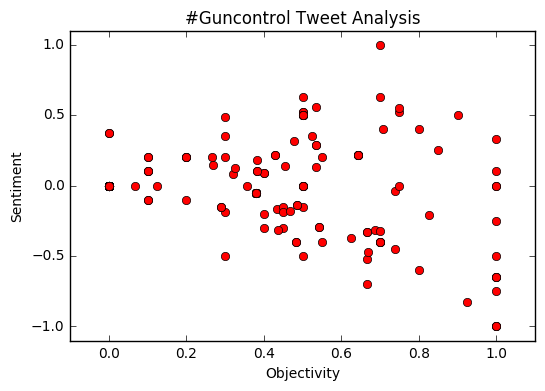

In [10]:
##Determining sentiment analysis for tweets with #guncontrol
from pattern.en import *

sent=[]
obj=[]

for i in reloaded_guncontrol_tweets:
    score=(sentiment(i))
    sent.append(score[0])
    obj.append(score[1])
    
import matplotlib.pyplot as plt
plt.plot(obj,sent,'ro')
plt.title('#Guncontrol Tweet Analysis')
plt.xlabel('Objectivity')
plt.ylabel('Sentiment')
plt.axis([-0.1, 1.1, -1.1, 1.1])
plt.show()

In [11]:
import numpy as np
x=np.array(obj)
y=np.array(sent)

from scipy import stats 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

('r-squared:', 0.043290248019426797)


In [28]:
#Further analysis of #guncontrol tweets
import numpy as np
print np.mean(sent)
print np.mean(obj)

-0.00940016196188
0.240423370611


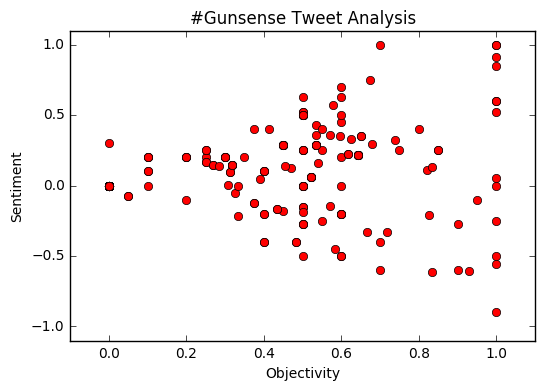

In [6]:
##Determining sentiment analysis for tweets with #gunsense
from pattern.en import *

sent=[]
obj=[]

for i in reloaded_gunsense_tweets:
    score=(sentiment(i))
    sent.append(score[0])
    obj.append(score[1])
    
import matplotlib.pyplot as plt
plt.plot(obj,sent, 'ro')
plt.title('#Gunsense Tweet Analysis')
plt.xlabel('Objectivity')
plt.ylabel('Sentiment')
plt.axis([-0.1, 1.1, -1.1, 1.1])
plt.show()

In [7]:
import numpy as np
x=np.array(obj)
y=np.array(sent)

from scipy import stats 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

('r-squared:', 0.035828845198499604)


In [30]:
#Further analysis for #Gunsense tweets
import numpy as np
print np.mean(sent)
print np.mean(obj)

0.0311403471764
0.289087603232


In [ ]:
#Run to view the raw data
print reloaded_guncontrol_tweets
print reloaded_gunsense_tweets